In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def s(r, f=0.5, l=1.5):
    return f*np.exp(-r/l) - np.exp(-r)

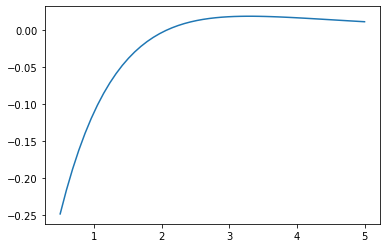

In [4]:
x = np.linspace(0.5, 5)
y = s(x)

plt.plot(x, y)

In [5]:
def f_spherical(x):
    return np.sum(x**2, axis=1)

In [6]:
def select_best(f_obj, x):
    f_vals = f_obj(x)
    return x[np.argmin(f_vals)]


def goa(f_obj, x0, lower=None, upper=None, s=s, c_min=1e-5, c_max=1, n_iter=100):
    
    n, d = x0.shape
    x = np.empty((n_iter, n, d))
    x[0] = x0
    
    x_best = select_best(f_obj, x[0]) 
    for k in range(1, n_iter):
        c = c_max - (k - 1)*(c_max - c_min)/(n_iter - 2)
        for i in range(n):
            x[k, i] = x_best
            for j in range(n):
                if j == i:
                    continue

                diff = x[k-1, j] - x[k-1, i]
                x[k, i] += c**2 * (upper - lower)/2 * s(np.abs(diff)) * diff/max(np.linalg.norm(diff), 1e-6)
        
        x = np.clip(x, lower, upper)
        x_best = select_best(f_obj, x[k])
  
    return x

In [7]:
np.random.seed(1234)
x0 = 20 + 10 * np.random.uniform(size=(5, 2))

#goa(f_spherical, x0, -500, 500)[:4]

In [8]:
y = np.array([[  22.22367664,  -20.93140786],
            [  22.228402  ,  -22.18075939],
            [  22.50125294,  -20.93140786],
            [  22.22367664,  -22.18075939],
            [  22.50479208,  -20.93142809]])
goa(f_spherical, y, -500, 500)[:4]

array([[[  22.22367664,  -20.93140786],
        [  22.228402  ,  -22.18075939],
        [  22.50125294,  -20.93140786],
        [  22.22367664,  -22.18075939],
        [  22.50479208,  -20.93142809]],

       [[-319.95403064,   48.38391567],
        [ 197.84660356, -123.26305945],
        [  18.28323668,   48.17249708],
        [-300.66457551, -123.20923311],
        [ 500.        ,   45.25884051]],

       [[  18.28330761,   48.25316418],
        [  18.28323668,   48.14789112],
        [  18.28323668,   48.00607396],
        [  18.28316574,   48.19710304],
        [  18.28323668,   48.25825308]],

       [[  22.46400386,  411.80353297],
        [  18.46736273, -393.49336604],
        [  18.30344585, -500.        ],
        [  16.96318162,   14.19764916],
        [  15.21818932,  500.        ]]])